<a href="https://colab.research.google.com/github/ranjanguddu/Machine-Learning/blob/master/EVA4/Session-11/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# let's mount our google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/EVA4_Assignment/Modules')

In [2]:
!ls -l

total 50
-rw------- 1 root root  1424 Apr 11 06:22 Albumentation_Process.py
-rw------- 1 root root  2254 Apr 11 05:36 CLR.py
drwx------ 3 root root  4096 Apr 11 05:38 data
-rw------- 1 root root   564 Apr 11 05:45 DataLoaders.py
-rw------- 1 root root   527 Apr 11 05:36 Denorm.py
-rw------- 1 root root  1078 Apr 11 05:36 Display.py
-rw------- 1 root root   764 Apr 11 05:36 Find_Data_Stats.py
-rw------- 1 root root 18977 Apr  3 16:31 LR_Finder.py
drwx------ 4 root root  4096 Mar 21 11:31 models
-rw------- 1 root root  6230 Apr 11 05:36 OneCycle.py
drwx------ 2 root root  4096 Apr 11 05:38 __pycache__
-rw------- 1 root root   909 Apr 11 06:17 Test_the_Model.py
-rw------- 1 root root   434 Apr 11 07:48 Traingular_Plot.py
-rw------- 1 root root  1904 Apr 11 07:11 Train_the_Model.py


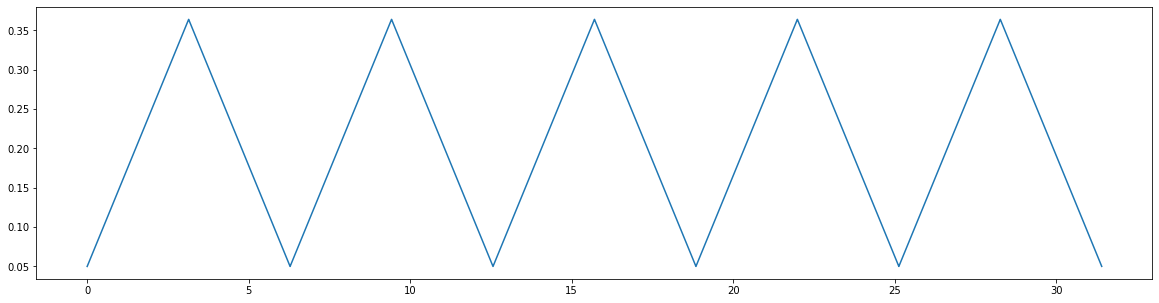

In [3]:
import Traingular_Plot

Traingular_Plot.Cosine_Plot()



In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from Denorm import unnormalize


In [5]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)

Files already downloaded and verified


In [6]:
from Find_Data_Stats import Cal_Mean_STD

mu, std = Cal_Mean_STD.cal_stats(train)
print("Statistics of the datset is :- \nMean:{}\nStandard Deviation: {}".format(mu,std))



Statistics of the datset is :- 
Mean:[0.49139968 0.48215841 0.44653091]
Standard Deviation: [0.24703223 0.24348513 0.26158784]


In [7]:
from Albumentation_Process import Albumentations

channel_means = mu
channel_stdevs = std
norm_mean_std=[channel_means,channel_stdevs]
# Train Phase transformations
#train_transforms = Albumentations(norm_mean_std,Rotate=(-30.0,30.0),HorizontalFlip=True,cutout=(4,))
train_transforms = Albumentations(norm_mean_std,Rotate=(-30.0,30.0),Padding = True, R_Crop = True, cutout=(4,))
# Test Phase transformations
test_transforms = Albumentations(norm_mean_std)

in the init of Albumentation
Finally Append become:[<albumentations.augmentations.transforms.Rotate object at 0x7f1813d6cda0>, <albumentations.augmentations.transforms.PadIfNeeded object at 0x7f1813d6ce48>, <albumentations.augmentations.transforms.RandomCrop object at 0x7f1813d6ce80>, <albumentations.augmentations.transforms.Normalize object at 0x7f1813d6cf28>, <albumentations.augmentations.transforms.Cutout object at 0x7f1813d6cf98>, <albumentations.pytorch.transforms.ToTensor object at 0x7f1813d6cfd0>]
in the init of Albumentation
Finally Append become:[<albumentations.augmentations.transforms.Normalize object at 0x7f1813d6cd68>, <albumentations.pytorch.transforms.ToTensor object at 0x7f17f9c0e9e8>]


In [8]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import DataLoaders

loader = DataLoaders.DataLoader()

# train dataloader
train_loader = loader.load(train)

# test dataloader
test_loader = loader.load(test)

In [0]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


torch.Size([512, 3, 32, 32])
torch.Size([512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

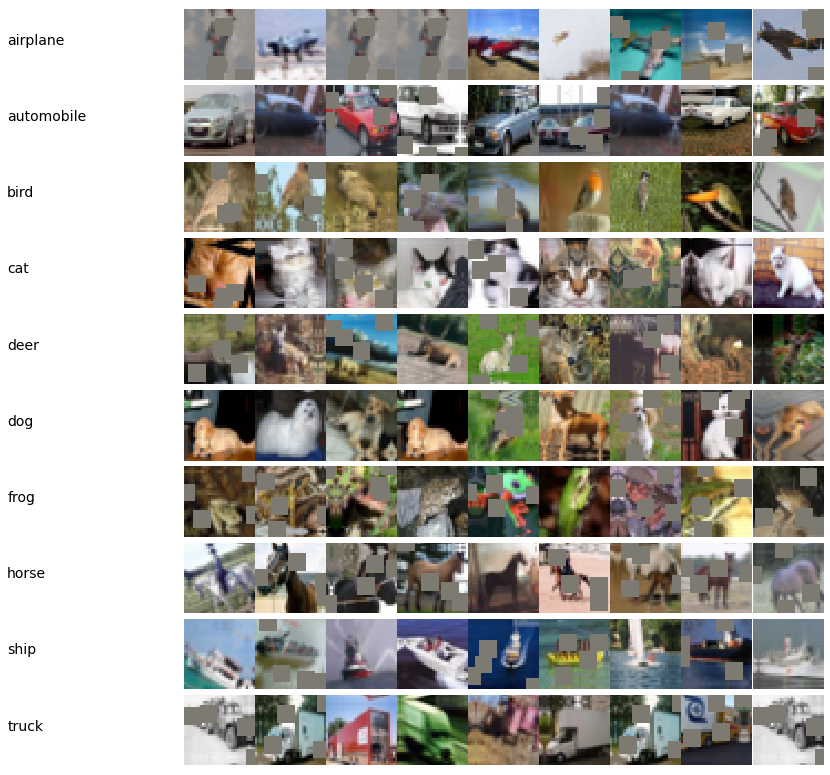

In [11]:
from Display import Display_Sample_Image
Display_Sample_Image(mu, std, train_loader)

In [12]:
from models.Assignment_11_Model import Net

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,728
         MaxPool2d-4          [-1, 128, 16, 16]               0
       BatchNorm2d-5          [-1, 128, 16, 16]             256
            Conv2d-6          [-1, 128, 16, 16]         147,456
       BatchNorm2d-7          [-1, 128, 16, 16]             256
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 256, 16, 16]         294,912
        MaxPool2d-11            [-1, 256, 8, 8]               0
      BatchNorm2d-12            [-1, 256, 8, 8]             512
           Conv2d-13            [-1, 512, 8, 8]       1,179,648
        MaxPool2d-14            [-1, 51

  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


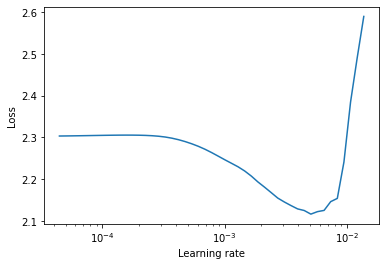

In [14]:
from LR_Finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, val_loader=test_loader, start_lr=1e-5, end_lr=2, num_iter=len(train_loader), step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [15]:
best_loss = lr_finder.best_loss
best_lr = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]
print("Best Loss: %s\nBest Learning Rate: %s" % (best_loss, best_lr))
lr = best_lr

Best Loss: 2.1163492782993423
Best Learning Rate: 0.005065322958572848


In [13]:
from Train_the_Model import train
from Test_the_Model import test
from torch.optim.lr_scheduler import ReduceLROnPlateau
from OneCycle import OneCycle
import time

Epochs = 40
bs = 512
lr=0.00736009752647928


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay = 1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3, verbose=True, min_lr=1e-5)


def run(l1_decay=0.0, l2_decay=0.0):
  l1_decay = 2e-05
  l2_decay = 0.002

  test_losses = []
  test_accs = []
  train_losses = []
  train_accs = []
  misclassified_imgs = []
  correct_imgs = []
  use_cycle = True
  print("\n")
  for epoch in range(Epochs):
      t0=time.time()
      print("EPOCH:", epoch+1)
      

      train(model, device,train_loader, criterion, optimizer, epoch, l1_decay,l2_decay, train_losses, train_accs)
      test(model, device, test_loader, criterion, class_names, test_losses, test_accs)

      scheduler.step(test_losses[-1])
      t1= time.time()
      print("Time taken in epoch {} is {:.2f} Seconds\n".format(epoch+1, (t1-t0)))
  return train_losses, train_accs, test_losses, test_accs

# train and test the model
train_losses, train_accs, test_losses, test_accs = run(l1_decay=2e-05, l2_decay= 0.002)

  0%|          | 0/98 [00:00<?, ?it/s]



EPOCH: 1


L2_loss=200.01031494140625 L1_loss=59126.75390625 Loss=3.117805004119873 Batch_id=97 Accuracy=32.52: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0028, Accuracy: 4804/10000 (48.04%)

Time taken in epoch 1 is 30.58 Seconds

EPOCH: 2


L2_loss=199.3885040283203 L1_loss=58198.7890625 Loss=2.7582356929779053 Batch_id=97 Accuracy=50.09: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0022, Accuracy: 5984/10000 (59.84%)

Time taken in epoch 2 is 30.82 Seconds

EPOCH: 3


L2_loss=198.8712615966797 L1_loss=57320.49609375 Loss=2.699208974838257 Batch_id=97 Accuracy=58.03: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0021, Accuracy: 6425/10000 (64.25%)

Time taken in epoch 3 is 30.43 Seconds

EPOCH: 4


L2_loss=198.37744140625 L1_loss=56471.71875 Loss=2.465012311935425 Batch_id=97 Accuracy=64.19: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0016, Accuracy: 7054/10000 (70.54%)

Time taken in epoch 4 is 30.96 Seconds

EPOCH: 5


L2_loss=197.86874389648438 L1_loss=55645.08984375 Loss=2.3827285766601562 Batch_id=97 Accuracy=68.33: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0015, Accuracy: 7391/10000 (73.91%)

Time taken in epoch 5 is 30.69 Seconds

EPOCH: 6


L2_loss=197.3538818359375 L1_loss=54839.94140625 Loss=2.3950161933898926 Batch_id=97 Accuracy=71.56: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0015, Accuracy: 7517/10000 (75.17%)

Time taken in epoch 6 is 30.93 Seconds

EPOCH: 7


L2_loss=196.82736206054688 L1_loss=54051.203125 Loss=2.1251957416534424 Batch_id=97 Accuracy=73.98: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0013, Accuracy: 7874/10000 (78.74%)

Time taken in epoch 7 is 30.89 Seconds

EPOCH: 8


L2_loss=196.3031768798828 L1_loss=53282.19140625 Loss=2.115561008453369 Batch_id=97 Accuracy=75.83: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 7983/10000 (79.83%)

Time taken in epoch 8 is 30.93 Seconds

EPOCH: 9


L2_loss=195.7706756591797 L1_loss=52527.8671875 Loss=2.078831434249878 Batch_id=97 Accuracy=77.13: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8107/10000 (81.07%)

Time taken in epoch 9 is 30.92 Seconds

EPOCH: 10


L2_loss=195.23597717285156 L1_loss=51787.71484375 Loss=2.1007983684539795 Batch_id=97 Accuracy=78.90: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8182/10000 (81.82%)

Time taken in epoch 10 is 30.48 Seconds

EPOCH: 11


L2_loss=194.7130889892578 L1_loss=51065.51171875 Loss=2.0174577236175537 Batch_id=97 Accuracy=80.51: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8151/10000 (81.51%)

Time taken in epoch 11 is 30.63 Seconds

EPOCH: 12


L2_loss=194.17710876464844 L1_loss=50359.50390625 Loss=1.9972712993621826 Batch_id=97 Accuracy=81.36: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8198/10000 (81.98%)

Time taken in epoch 12 is 30.92 Seconds

EPOCH: 13


L2_loss=193.65821838378906 L1_loss=49669.14453125 Loss=1.827373743057251 Batch_id=97 Accuracy=82.17: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0010, Accuracy: 8405/10000 (84.05%)

Time taken in epoch 13 is 30.91 Seconds

EPOCH: 14


L2_loss=193.12408447265625 L1_loss=48983.2890625 Loss=1.833058476448059 Batch_id=97 Accuracy=83.63: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0010, Accuracy: 8444/10000 (84.44%)

Time taken in epoch 14 is 30.76 Seconds

EPOCH: 15


L2_loss=192.6065216064453 L1_loss=48317.39453125 Loss=1.7917331457138062 Batch_id=97 Accuracy=84.26: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8513/10000 (85.13%)

Time taken in epoch 15 is 31.02 Seconds

EPOCH: 16


L2_loss=192.08775329589844 L1_loss=47665.06640625 Loss=1.8144489526748657 Batch_id=97 Accuracy=84.53: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8435/10000 (84.35%)

Time taken in epoch 16 is 30.79 Seconds

EPOCH: 17


L2_loss=191.56080627441406 L1_loss=47020.98828125 Loss=1.719413161277771 Batch_id=97 Accuracy=85.64: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8599/10000 (85.99%)

Time taken in epoch 17 is 31.05 Seconds

EPOCH: 18


L2_loss=191.0621795654297 L1_loss=46399.62109375 Loss=1.6871998310089111 Batch_id=97 Accuracy=86.17: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8629/10000 (86.29%)

Time taken in epoch 18 is 30.96 Seconds

EPOCH: 19


L2_loss=190.55970764160156 L1_loss=45782.23046875 Loss=1.7030489444732666 Batch_id=97 Accuracy=86.63: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8638/10000 (86.38%)

Time taken in epoch 19 is 30.90 Seconds

EPOCH: 20


L2_loss=190.06976318359375 L1_loss=45189.29296875 Loss=1.6926171779632568 Batch_id=97 Accuracy=86.82: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8573/10000 (85.73%)

Time taken in epoch 20 is 31.09 Seconds

EPOCH: 21


L2_loss=189.56788635253906 L1_loss=44599.046875 Loss=1.6523222923278809 Batch_id=97 Accuracy=87.62: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0008, Accuracy: 8686/10000 (86.86%)

Time taken in epoch 21 is 30.82 Seconds

EPOCH: 22


L2_loss=189.07142639160156 L1_loss=44018.45703125 Loss=1.608588457107544 Batch_id=97 Accuracy=88.08: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8549/10000 (85.49%)

Time taken in epoch 22 is 31.02 Seconds

EPOCH: 23


L2_loss=188.5800018310547 L1_loss=43450.59375 Loss=1.5342698097229004 Batch_id=97 Accuracy=88.54: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0008, Accuracy: 8787/10000 (87.87%)

Time taken in epoch 23 is 31.17 Seconds

EPOCH: 24


L2_loss=188.09373474121094 L1_loss=42894.66796875 Loss=1.5335428714752197 Batch_id=97 Accuracy=89.05: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8706/10000 (87.06%)

Time taken in epoch 24 is 31.19 Seconds

EPOCH: 25


L2_loss=187.5882568359375 L1_loss=42341.07421875 Loss=1.6255563497543335 Batch_id=97 Accuracy=89.75: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0007, Accuracy: 8832/10000 (88.32%)

Time taken in epoch 25 is 30.81 Seconds

EPOCH: 26


L2_loss=187.11151123046875 L1_loss=41811.390625 Loss=1.575927734375 Batch_id=97 Accuracy=89.67: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0008, Accuracy: 8752/10000 (87.52%)

Time taken in epoch 26 is 30.92 Seconds

EPOCH: 27


L2_loss=186.65025329589844 L1_loss=41295.109375 Loss=1.5319185256958008 Batch_id=97 Accuracy=89.56: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8722/10000 (87.22%)

Time taken in epoch 27 is 30.66 Seconds

EPOCH: 28


L2_loss=186.17787170410156 L1_loss=40781.578125 Loss=1.4717159271240234 Batch_id=97 Accuracy=89.91: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8677/10000 (86.77%)

Time taken in epoch 28 is 31.13 Seconds

EPOCH: 29


L2_loss=185.68531799316406 L1_loss=40264.3203125 Loss=1.50015389919281 Batch_id=97 Accuracy=90.57: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0008, Accuracy: 8730/10000 (87.30%)

Epoch    29: reducing learning rate of group 0 to 7.3601e-04.
Time taken in epoch 29 is 31.21 Seconds

EPOCH: 30


L2_loss=185.59507751464844 L1_loss=40165.98828125 Loss=1.327631950378418 Batch_id=97 Accuracy=93.25: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9049/10000 (90.49%)

Time taken in epoch 30 is 30.83 Seconds

EPOCH: 31


L2_loss=185.50848388671875 L1_loss=40069.12890625 Loss=1.258192539215088 Batch_id=97 Accuracy=94.10: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9061/10000 (90.61%)

Time taken in epoch 31 is 31.24 Seconds

EPOCH: 32


L2_loss=185.4237060546875 L1_loss=39973.8046875 Loss=1.3281335830688477 Batch_id=97 Accuracy=94.49: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9080/10000 (90.80%)

Time taken in epoch 32 is 30.87 Seconds

EPOCH: 33


L2_loss=185.33935546875 L1_loss=39879.89453125 Loss=1.3263323307037354 Batch_id=97 Accuracy=94.69: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9076/10000 (90.76%)

Time taken in epoch 33 is 31.23 Seconds

EPOCH: 34


L2_loss=185.25624084472656 L1_loss=39787.1015625 Loss=1.3563494682312012 Batch_id=97 Accuracy=94.73: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9092/10000 (90.92%)

Time taken in epoch 34 is 30.80 Seconds

EPOCH: 35


L2_loss=185.17434692382812 L1_loss=39695.0078125 Loss=1.3166285753250122 Batch_id=97 Accuracy=95.01: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9089/10000 (90.89%)

Time taken in epoch 35 is 31.00 Seconds

EPOCH: 36


L2_loss=185.0919647216797 L1_loss=39603.703125 Loss=1.2903568744659424 Batch_id=97 Accuracy=95.11: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9085/10000 (90.85%)

Time taken in epoch 36 is 31.37 Seconds

EPOCH: 37


L2_loss=185.0108184814453 L1_loss=39513.28125 Loss=1.342791199684143 Batch_id=97 Accuracy=95.16: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9105/10000 (91.05%)

Time taken in epoch 37 is 31.17 Seconds

EPOCH: 38


L2_loss=184.92982482910156 L1_loss=39423.40625 Loss=1.2789947986602783 Batch_id=97 Accuracy=95.34: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9116/10000 (91.16%)

Time taken in epoch 38 is 31.15 Seconds

EPOCH: 39


L2_loss=184.84884643554688 L1_loss=39334.25 Loss=1.309449315071106 Batch_id=97 Accuracy=95.38: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9104/10000 (91.04%)

Time taken in epoch 39 is 30.80 Seconds

EPOCH: 40


L2_loss=184.7670135498047 L1_loss=39245.9765625 Loss=1.3091727495193481 Batch_id=97 Accuracy=95.22: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]


Test set: Average loss: 0.0006, Accuracy: 9138/10000 (91.38%)

Time taken in epoch 40 is 31.05 Seconds



In [0]:
torch.save(model.state_dict(), 'Model_Saved.pt')